In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [3]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


In [5]:
train.describe()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,2748.000000,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,1586.991546,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,0.000000,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,1374.000000,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,2748.000000,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,4122.000000,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,5496.000000,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [6]:
train.drop(columns='index', inplace=True)

<Axes: xlabel='quality', ylabel='count'>

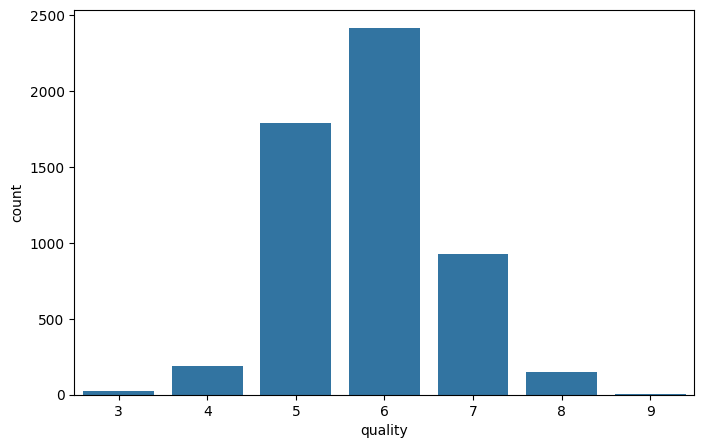

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=train)

In [8]:
train.quality.value_counts()

quality
6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: count, dtype: int64

==> 특정 label에 매우 편향된 데이터셋

In [9]:
train['type'].value_counts()

type
white    4159
red      1338
Name: count, dtype: int64

### 전체 column들의 분포 파악

<Axes: xlabel='alcohol', ylabel='Count'>

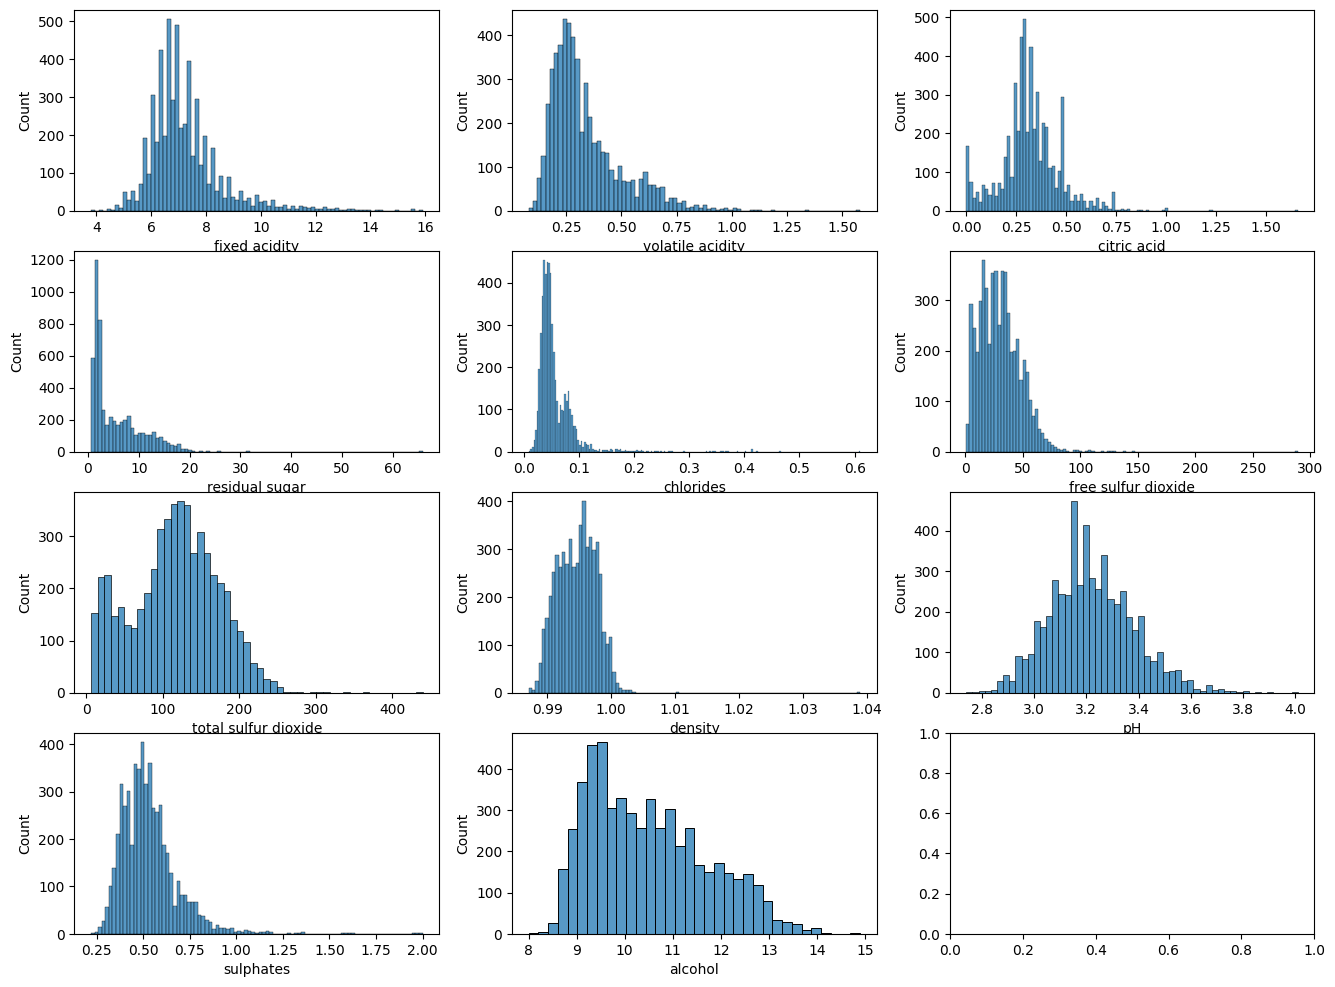

In [10]:
fig, axes = plt.subplots(4, 3, figsize=(16, 12))

sns.histplot(data=train, x='fixed acidity', ax=axes[0][0])
sns.histplot(data=train, x='volatile acidity', ax=axes[0][1])
sns.histplot(data=train, x='citric acid', ax=axes[0][2])

sns.histplot(data=train, x='residual sugar', ax=axes[1][0])
sns.histplot(data=train, x='chlorides', ax=axes[1][1])
sns.histplot(data=train, x='free sulfur dioxide', ax=axes[1][2])

sns.histplot(data=train, x='total sulfur dioxide', ax=axes[2][0])
sns.histplot(data=train, x='density', ax=axes[2][1])
sns.histplot(data=train, x='pH', ax=axes[2][2])

sns.histplot(data=train, x='sulphates', ax=axes[3][0])
sns.histplot(data=train, x='alcohol', ax=axes[3][1])

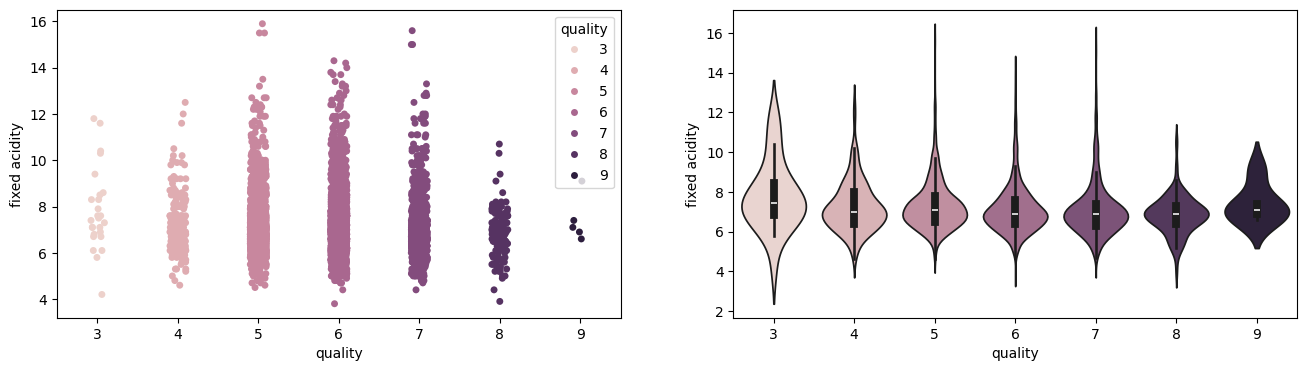

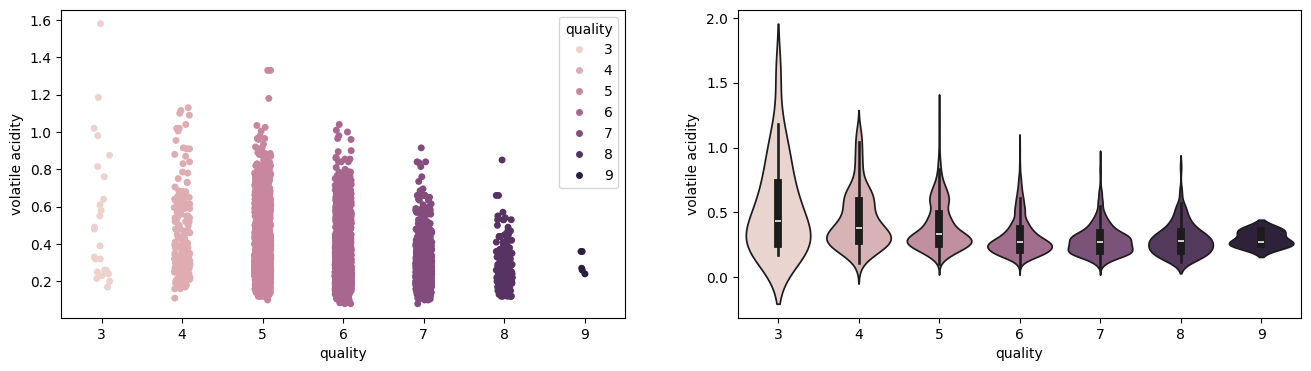

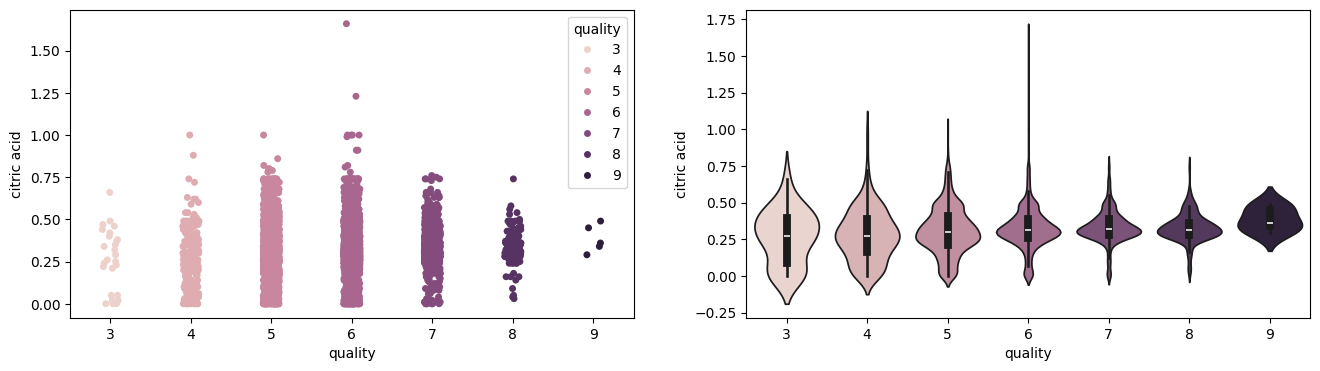

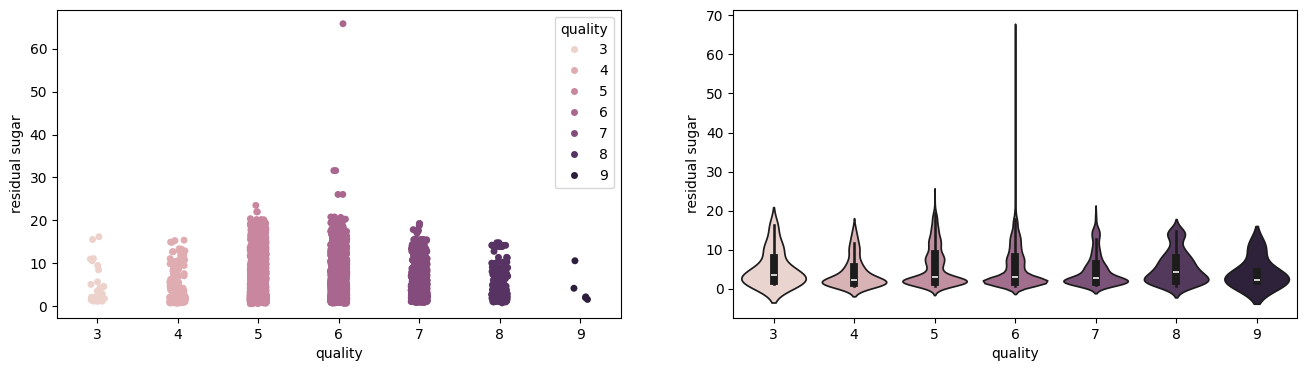

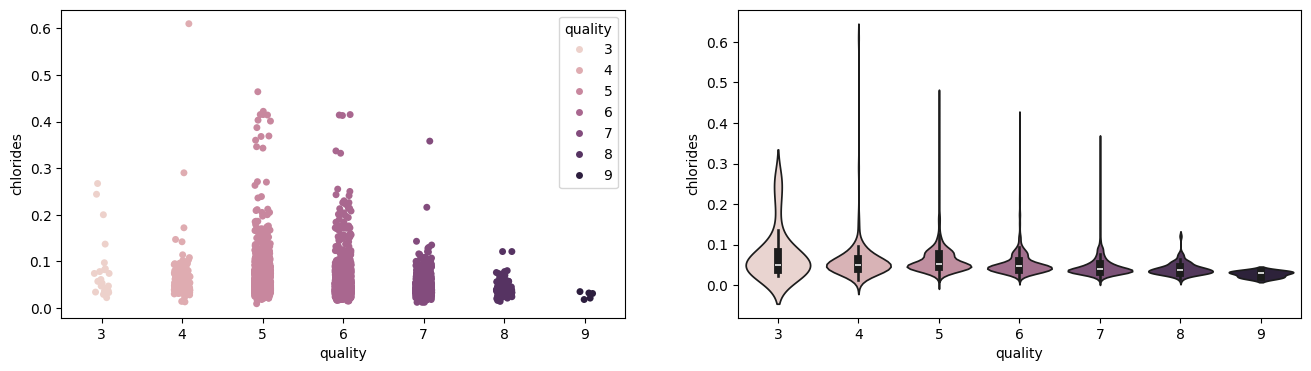

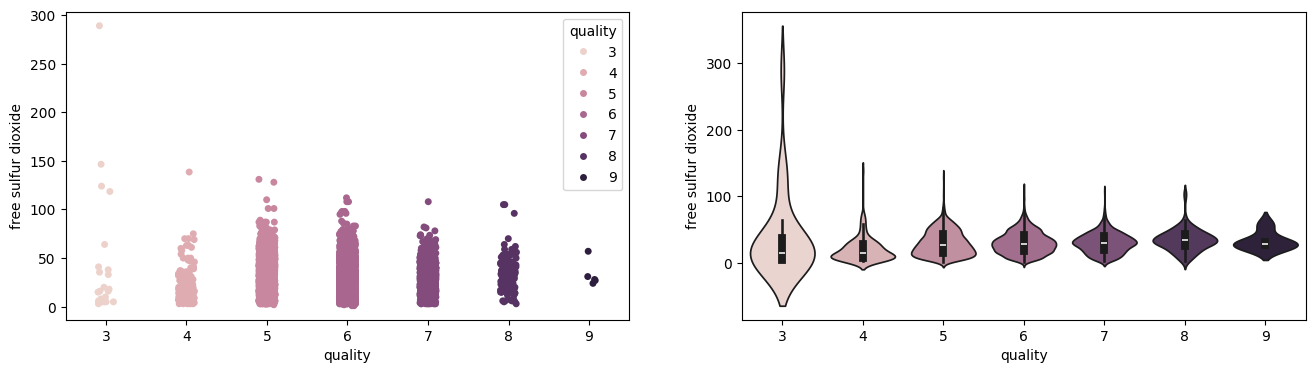

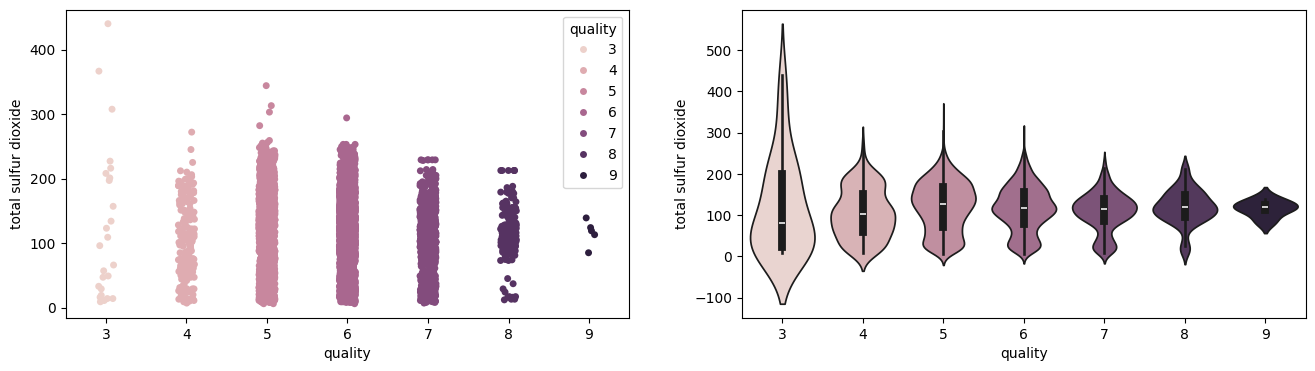

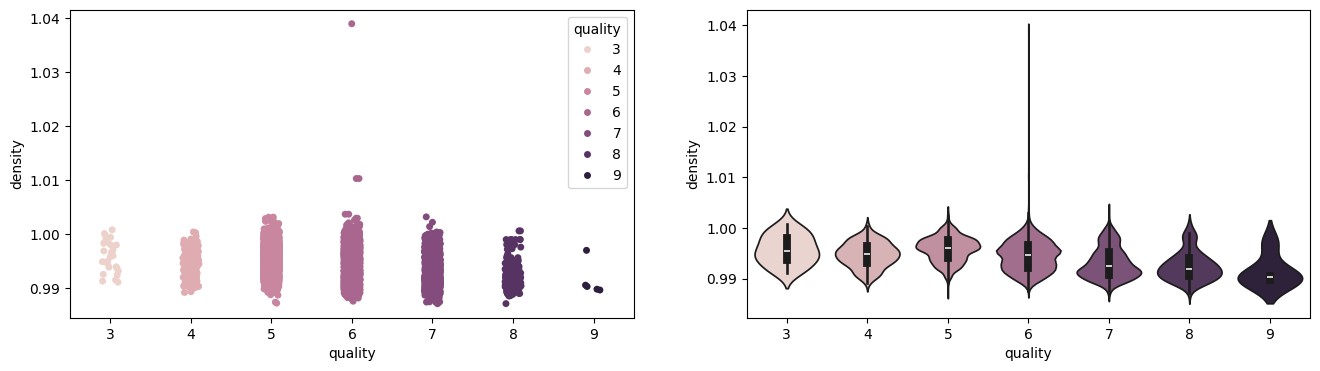

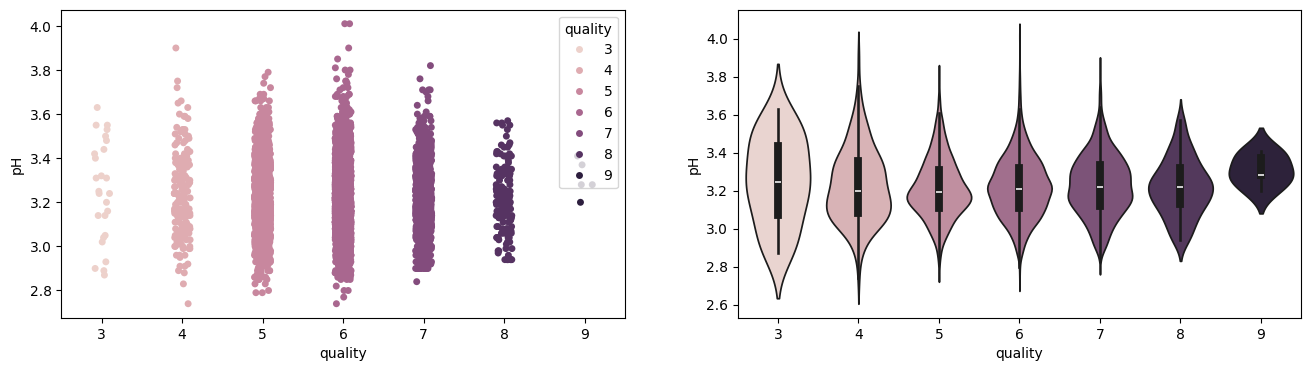

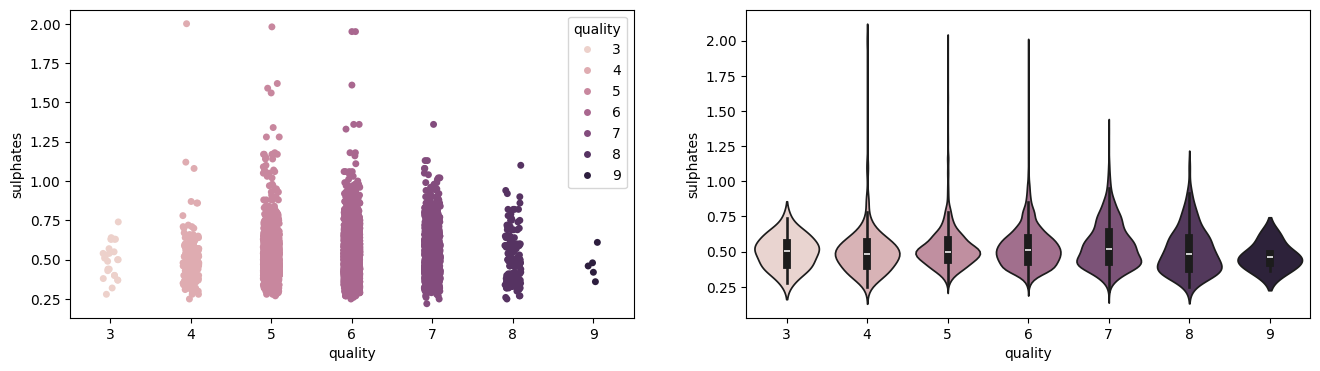

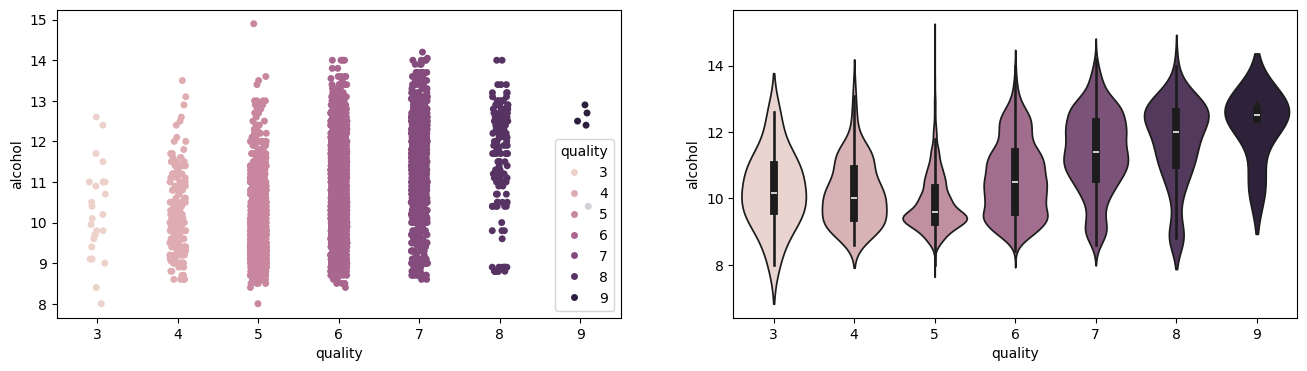

In [11]:
numeric_col = train.select_dtypes(exclude='object').columns.tolist()
numeric_col.remove('quality')

for col in numeric_col:
    fig, ax = plt.subplots(1, 2, figsize=(16, 4))
    sns.stripplot(x=train['quality'], y=train[col], hue=train['quality'], ax=ax[0])
    sns.violinplot(x=train['quality'], y=train[col], hue=train['quality'], ax=ax[1])
    plt.legend().remove()

In [12]:
type_map = { 'white':0, 'red':1 }
train['type'] = train['type'].map(type_map)
test['type'] = train['type'].map(type_map)
train.head()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,1
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0


In [13]:
train.drop(columns='type').corr()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,1.000000,-0.076506,-0.261557,0.079157,-0.032848,-0.198148,0.055574,-0.039732,-0.299831,0.017931,0.042068,0.439615
fixed acidity,-0.076506,1.000000,0.210180,0.326992,-0.112544,0.303307,-0.277079,-0.323845,0.452161,-0.250462,0.300979,-0.096274
volatile acidity,-0.261557,0.210180,1.000000,-0.377986,-0.192677,0.385431,-0.352572,-0.418535,0.266759,0.264130,0.225174,-0.032897
citric acid,0.079157,0.326992,-0.377986,1.000000,0.135160,0.029121,0.129496,0.190955,0.088400,-0.322100,0.049013,-0.005376
residual sugar,-0.032848,-0.112544,-0.192677,0.135160,1.000000,-0.130339,0.396018,0.494788,0.557183,-0.259673,-0.182275,-0.361457
chlorides,-0.198148,0.303307,0.385431,0.029121,-0.130339,1.000000,-0.193143,-0.281654,0.364200,0.046937,0.400354,-0.259774
free sulfur dioxide,0.055574,-0.277079,-0.352572,0.129496,0.396018,-0.193143,1.000000,0.716829,0.027270,-0.145586,-0.189390,-0.182321
total sulfur dioxide,-0.039732,-0.323845,-0.418535,0.190955,0.494788,-0.281654,0.716829,1.000000,0.039707,-0.234412,-0.272236,-0.271566
density,-0.299831,0.452161,0.266759,0.088400,0.557183,0.364200,0.027270,0.039707,1.000000,0.020047,0.261879,-0.688053
pH,0.017931,-0.250462,0.264130,-0.322100,-0.259673,0.046937,-0.145586,-0.234412,0.020047,1.000000,0.187392,0.114959


<Axes: >

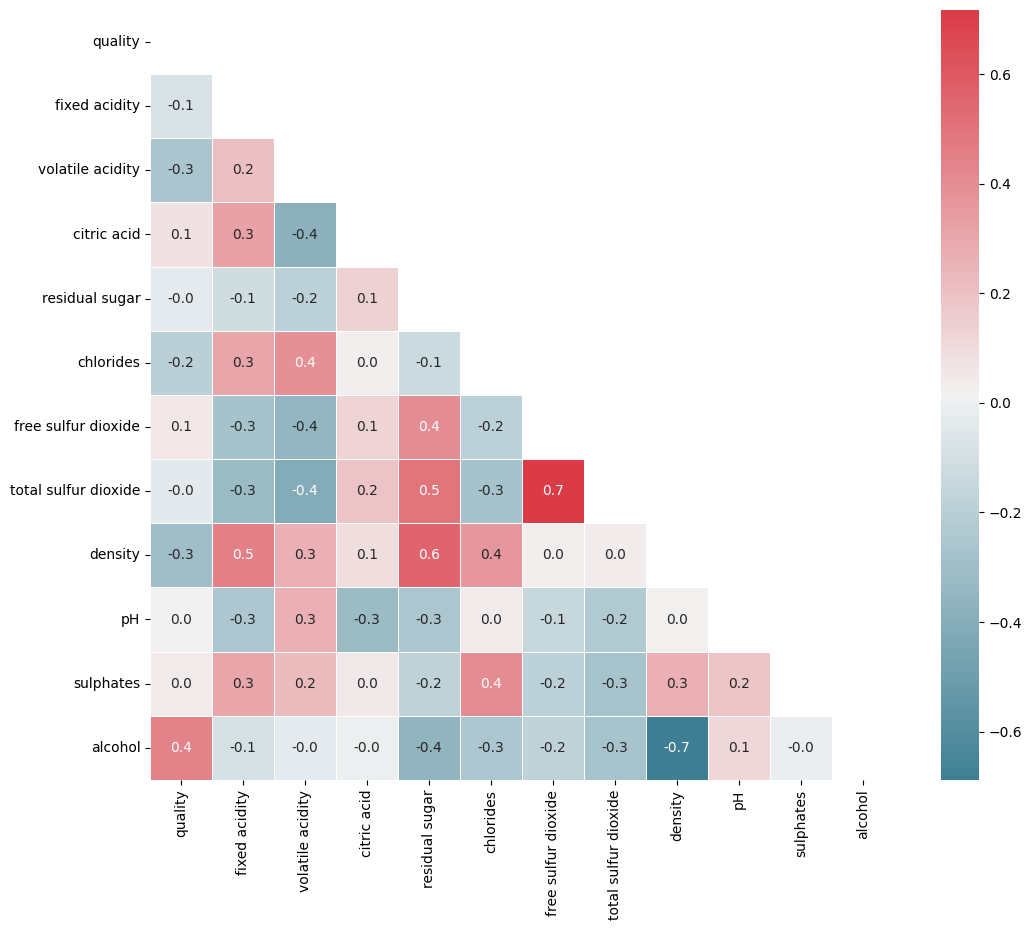

In [20]:
corr = train.drop(columns='type').corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, fmt='.1f', linewidths='.5')

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train[numeric_col] = scaler.fit_transform(train[numeric_col])

In [23]:
train.describe()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
count,5497.000000,5.497000e+03,5.497000e+03,5.497000e+03,5.497000e+03,5.497000e+03,5.497000e+03,5.497000e+03,5.497000e+03,5.497000e+03,5.497000e+03,5.497000e+03,5497.000000
mean,5.818992,-4.524103e-18,-1.900123e-16,-5.816704e-17,-1.809641e-17,1.454176e-17,-7.884866e-17,8.014126e-17,1.981105e-14,2.274978e-15,3.877803e-18,-2.329913e-16,0.243405
std,0.870311,1.000091e+00,1.000091e+00,1.000091e+00,1.000091e+00,1.000091e+00,1.000091e+00,1.000091e+00,1.000091e+00,1.000091e+00,1.000091e+00,1.000091e+00,0.429177
min,3.000000,-2.648711e+00,-1.581787e+00,-2.195474e+00,-1.017205e+00,-1.350876e+00,-1.664624e+00,-1.946703e+00,-2.509732e+00,-2.983864e+00,-2.078720e+00,-2.097193e+00,0.000000
25%,5.000000,-6.292338e-01,-6.627228e-01,-4.724138e-01,-7.649052e-01,-5.139393e-01,-7.592505e-01,-6.674559e-01,-7.875447e-01,-6.814112e-01,-6.729308e-01,-8.413478e-01,0.000000
50%,6.000000,-1.632006e-01,-2.950971e-01,-5.887933e-02,-5.126052e-01,-2.542002e-01,-8.022071e-02,4.323694e-02,4.202510e-02,-5.912665e-02,-1.373920e-01,-1.715639e-01,0.000000
75%,6.000000,3.805048e-01,3.788835e-01,4.925000e-01,5.596696e-01,2.364181e-01,5.988091e-01,7.006278e-01,7.488186e-01,6.253863e-01,4.650892e-01,6.656661e-01,0.000000
max,9.000000,6.749625e+00,7.608856e+00,9.245647e+00,1.269109e+01,1.599392e+01,1.463209e+01,5.764315e+00,1.470218e+01,4.919150e+00,9.837018e+00,3.679694e+00,1.000000


In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null   float64
 11  alcohol               5497 non-null   float64
 12  type                  5497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 558.4 KB


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import KFold, cross_validate, cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [26]:
models = {
    'DT': DecisionTreeClassifier(),
    'RF': RandomForestClassifier(),
    'GB': GradientBoostingClassifier()
}

In [28]:
X = train.drop(columns='quality')
y = train['quality']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [33]:
for name, model in models.items():
    score = cross_validate(model, X_train, y_train, return_train_score=True, cv=StratifiedKFold(), n_jobs=-1)
    print(f"{name} : {np.mean(score['train_score'])}, {np.mean(score['test_score'])}")

DT : 1.0, 0.5596917985313891
RF : 1.0, 0.6552182231875064
GB : 0.7502840826890844, 0.5876696142310477


In [37]:
rf_params = {
    'max_depth': range(2, 20, 2),
    'n_estimators': [100, 200, 300]
}

In [38]:
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid=rf_params, cv=5, n_jobs=-1)
grid_rf.fit(X_train, y_train)
pred = grid_rf.predict(X_test)
accuracy_score(y_test, pred)

0.6654545454545454

In [39]:
grid_rf.best_params_

{'max_depth': 18, 'n_estimators': 200}

In [40]:
model = grid_rf.best_estimator_
model.fit(X, y)

RandomForestClassifier(max_depth=18, n_estimators=200)

In [58]:
test = pd.read_csv("data/test.csv")
test['type'] = test['type'].map(type_map)
test[numeric_col] = scaler.transform(test[numeric_col])
test.drop(columns='index', inplace=True)
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,1.390243,-0.172555,1.112802,0.244295,-0.369640,-1.098765,-0.756293,-0.289803,-1.988209,-1.007643,0.916835,0
1,4.730148,0.562696,1.802026,-0.743880,0.409577,-0.872422,-1.342614,1.900261,-0.992553,-0.271277,-1.259963,1
2,-0.551562,-0.356368,-0.334569,-0.050055,-0.456220,0.768567,1.127044,0.042025,-0.183584,1.067570,-0.925071,0
3,-0.007856,-1.152890,0.492500,-0.764905,-0.369640,-0.532907,0.771697,0.042025,1.869955,-0.405161,-0.422733,0
4,-0.318545,-0.478910,-0.403491,-0.722855,-1.062277,-0.391443,-0.774060,-1.414699,-0.370269,-0.405161,1.084281,0


In [59]:
result = model.predict(test)

In [60]:
result

array([5, 6, 6, 5, 6, 6, 6, 6, 6, 7, 6, 6, 7, 6, 6, 5, 6, 6, 6, 5, 6, 6,
       5, 7, 6, 5, 5, 5, 5, 5, 7, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6, 5,
       6, 6, 5, 6, 4, 6, 5, 5, 6, 4, 5, 6, 6, 5, 5, 6, 5, 6, 6, 4, 6, 6,
       5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 6, 6, 7, 7, 6, 5, 5, 6, 6, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6, 7, 5,
       6, 6, 6, 5, 5, 6, 6, 7, 7, 6, 6, 5, 6, 6, 5, 5, 6, 6, 6, 7, 5, 5,
       4, 5, 5, 6, 6, 7, 5, 5, 5, 6, 5, 5, 5, 5, 7, 6, 6, 6, 5, 8, 6, 5,
       6, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5, 6, 6,
       6, 5, 6, 5, 6, 6, 7, 7, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 7, 5,
       5, 5, 6, 5, 6, 6, 5, 5, 6, 6, 6, 6, 7, 5, 5, 5, 6, 6, 6, 6, 6, 7,
       6, 5, 6, 6, 7, 6, 6, 5, 6, 5, 6, 7, 7, 6, 6, 6, 5, 6, 6, 7, 6, 6,
       6, 6, 7, 6, 6, 6, 6, 6, 5, 6, 6, 7, 6, 6, 6, 7, 6, 6, 7, 6, 5, 7,
       5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 7, 7, 5, 6, 6, 6, 6, 5, 7, 7,
       6, 6, 6, 6, 5, 5, 5, 6, 5, 7, 8, 6, 5, 7, 7,

In [61]:
index = pd.read_csv('data/test.csv')
index = index['index']

In [62]:
submission = pd.DataFrame({
    'index': index,
    'quality': result
})

In [63]:
submission.to_csv('submission.csv', index=False)